In [17]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier



import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/breastcancer-dataset/data.csv


In [2]:
df = pd.read_csv("/kaggle/input/breastcancer-dataset/data.csv")

In [3]:
df.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


In [4]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [5]:
df.info

<bound method DataFrame.info of            id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0

In [6]:
df.drop(["id","Unnamed: 32"],axis=1,inplace=True)

In [7]:
M = df[df.diagnosis == "M"]
B = df[df.diagnosis == "B"]

In [8]:
M.info()
B.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 212 entries, 0 to 567
Data columns (total 31 columns):
diagnosis                  212 non-null object
radius_mean                212 non-null float64
texture_mean               212 non-null float64
perimeter_mean             212 non-null float64
area_mean                  212 non-null float64
smoothness_mean            212 non-null float64
compactness_mean           212 non-null float64
concavity_mean             212 non-null float64
concave points_mean        212 non-null float64
symmetry_mean              212 non-null float64
fractal_dimension_mean     212 non-null float64
radius_se                  212 non-null float64
texture_se                 212 non-null float64
perimeter_se               212 non-null float64
area_se                    212 non-null float64
smoothness_se              212 non-null float64
compactness_se             212 non-null float64
concavity_se               212 non-null float64
concave points_se          212 n

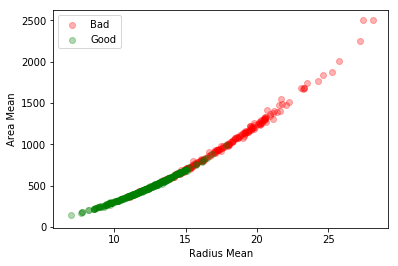

In [9]:
plt.scatter(M.radius_mean,M.area_mean,color="red",label="Bad",alpha=0.3)
plt.scatter(B.radius_mean,B.area_mean,color="green",label="Good",alpha=0.3)
plt.legend()
plt.xlabel("Radius Mean")
plt.ylabel("Area Mean")
plt.show()

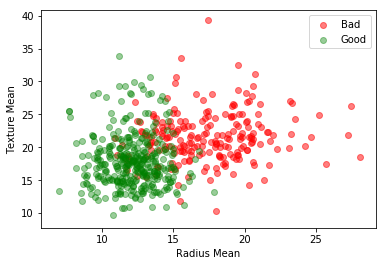

In [10]:
plt.scatter(M.radius_mean,M.texture_mean,color="red",label="Bad",alpha=0.5)
plt.scatter(B.radius_mean,B.texture_mean,color="green",label="Good",alpha=0.4)
plt.legend()
plt.xlabel("Radius Mean")
plt.ylabel("Texture Mean")
plt.show()

In [11]:
diagnosis = df.diagnosis.values
new_df = df.drop(["diagnosis"],axis=1)

In [12]:
diagnosis = [1 if each == "M" else 0 for each in diagnosis]

In [13]:
# Normalization
new_df = (new_df - np.min(new_df))/(np.max(new_df) - np.min(new_df))

In [16]:
# train test split
x_train,x_test,y_train,y_test = train_test_split(new_df,diagnosis,test_size=0.3,random_state=25)

In [20]:
# KNN Model
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(x_train,y_train)
predictions = knn_classifier.predict(x_test)

In [23]:
print("{} k of score: {}".format(3,knn_classifier.score(x_test,y_test)))

3 score: 0.9590643274853801


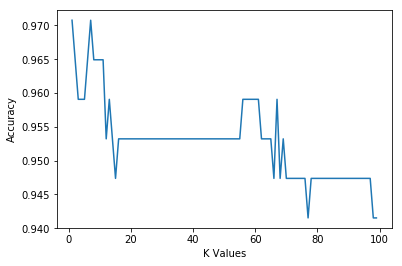

In [29]:
#find the k value [hyperparameter]
score_list =[]
for each in range(1,100):
    knn = KNeighborsClassifier(n_neighbors=each)
    knn.fit(x_train,y_train)
    score_list.append(knn.score(x_test,y_test))

plt.plot(range(1,100),score_list)
plt.xlabel("K Values")
plt.ylabel("Accuracy")
plt.show()

# K is 8 the best performance for KNN algorithm